# Assignment 3: Building Neural Networks and CNN
# Part I: Building a Basic NN [20 points]

# ACADEMIC INTERGITY STATEMENT 

I/We certify that the code and data in this assignment were generated independently, 
using only the tools and resources defined in the course and that I/We did not receive any external help, coaching or contributions during the production of this work.

In [ ]:
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive 
#drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#df = pd.read_csv('gdrive/My Drive/Colab Notebooks/income_dataset.csv')
df = pd.read_csv('income_dataset.csv')

In [ ]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [ ]:
df.head

<bound method NDFrame.head of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married  

In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age                   38.581647
fnlwgt            189778.366512
education.num         10.080679
capital.gain        1077.648844
capital.loss          87.303830
hours.per.week        40.437456
dtype: float64

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df[df=='?'].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.tail

<bound method NDFrame.tail of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married  

In [ ]:
df.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [ ]:
for i in df.columns:
    df = df[~df[i].isin(['?'])]
df.dropna(inplace=True)

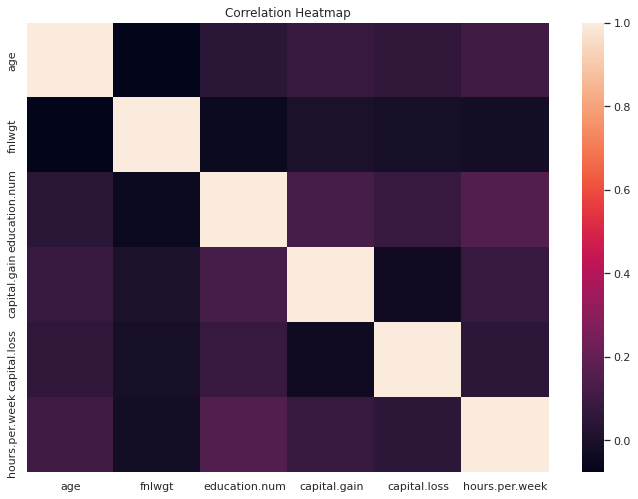

In [ ]:
sns.heatmap(df.corr()).set(title="Correlation Heatmap")
plt.show()

In [ ]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education.num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital.gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital.loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours.per.week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


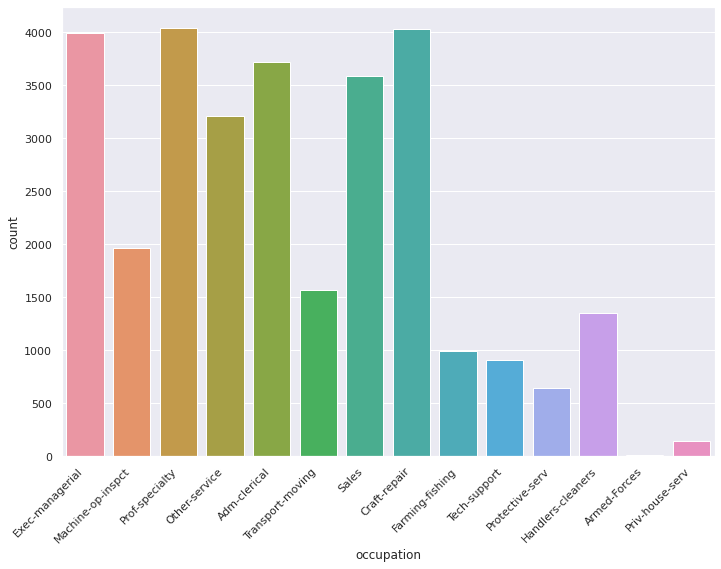

In [ ]:
sns.countplot(x ='occupation', data = df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
)
plt.show()

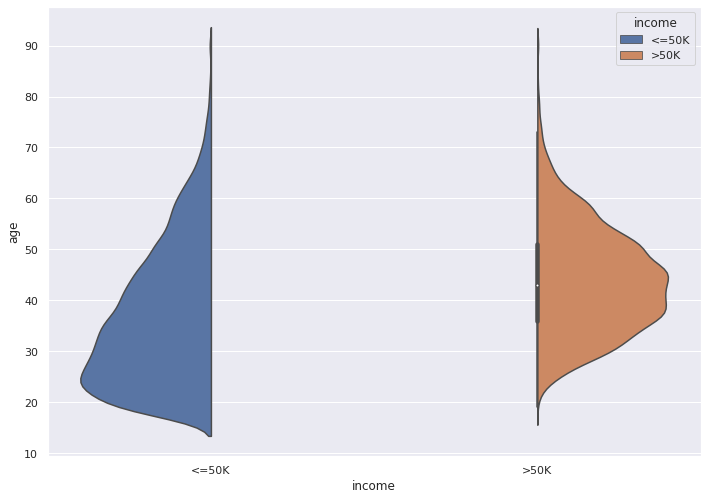

In [ ]:
sns.violinplot(x='income', y='age', data=df,
               hue='income',split=True)
plt.show()

In [ ]:
df['income'] = df['income'].astype('category')
df['native.country'] = df['native.country'].astype('category')
df['sex'] = df['sex'].astype('category')
df['race'] = df['race'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['marital.status'] = df['marital.status'].astype('category')
df['education'] = df['education'].astype('category')
df['workclass'] = df['workclass'].astype('category')

In [ ]:
Y = df.iloc[:,14:15].values
print(Y)

[['<=50K']
 ['<=50K']
 ['<=50K']
 ...
 ['>50K']
 ['<=50K']
 ['<=50K']]


In [ ]:

only_category = df.select_dtypes('category').columns

temp_df = pd.DataFrame()

for colummn in only_category:
    one_hot = pd.get_dummies(df[colummn])                
    unique_values = df[colummn].unique()
    for values in unique_values[1:]:        
        temp_df[values] = one_hot[values]

df = df.select_dtypes(exclude=['category'])
df = df.join(temp_df)

X = df.iloc[:,:96].values
print(X.shape)

(30162, 96)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()
print(Y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
min_max_scaler = MinMaxScaler()
sc = StandardScaler()
X = min_max_scaler.fit_transform(X)



In [ ]:
model = Sequential()
model.add(Dense(48, input_dim=96, activation='relu'))
#model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 48)                4656      
                                                                 
 dense_69 (Dense)            (None, 12)                588       
                                                                 
 dense_70 (Dense)            (None, 2)                 26        
                                                                 
Total params: 5,270
Trainable params: 5,270
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(24129, 96)
(6033, 96)
(24129, 2)
(6033, 2)


In [ ]:
nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=50,
          validation_data=(X_test, Y_test))

Epoch 1/50
378/378 [==============================] - 2s 3ms/step - loss: 0.4281 - accuracy: 0.7957 - val_loss: 0.3696 - val_accuracy: 0.8333
Epoch 2/50
378/378 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.8358 - val_loss: 0.3445 - val_accuracy: 0.8473
Epoch 3/50
378/378 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8407 - val_loss: 0.3370 - val_accuracy: 0.8485
Epoch 4/50
378/378 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.8443 - val_loss: 0.3330 - val_accuracy: 0.8483
Epoch 5/50
378/378 [==============================] - 1s 2ms/step - loss: 0.3240 - accuracy: 0.8474 - val_loss: 0.3307 - val_accuracy: 0.8503
Epoch 6/50
378/378 [==============================] - 1s 2ms/step - loss: 0.3196 - accuracy: 0.8496 - val_loss: 0.3276 - val_accuracy: 0.8531
Epoch 7/50
378/378 [==============================] - 1s 2ms/step - loss: 0.3163 - accuracy: 0.8504 - val_loss: 0.3281 - val_accuracy: 0.8520
Epoch 

In [ ]:
model.evaluate(X_test, Y_test)[1]

189/189 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8536


0.8536383509635925

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = -1)
Y_test = np.argmax(Y_test, axis = -1)
confusion_matrix(Y_test, y_pred)

array([[4185,  365],
       [ 518,  965]])

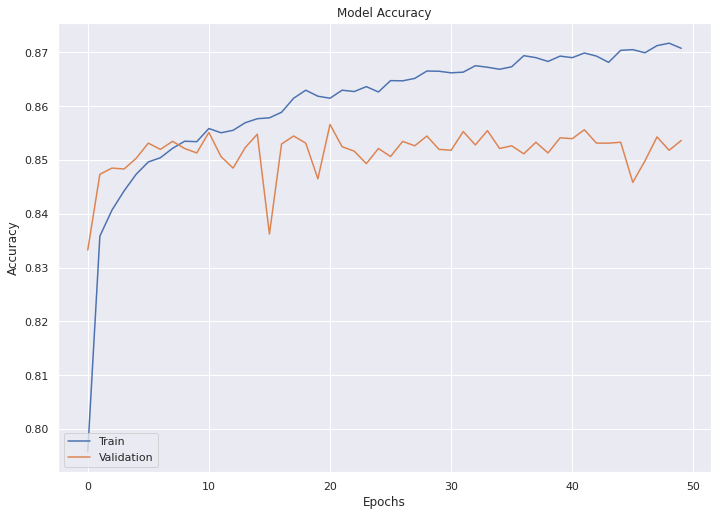

In [ ]:
import matplotlib.pyplot as plt
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

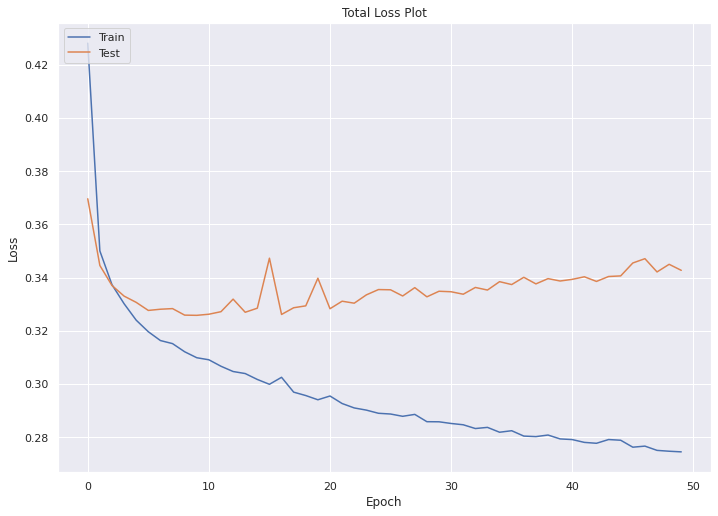

In [ ]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total Loss Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

# References
1) https://keras.io/api/ <br>
2) https://keras.io/api/models/sequential/ <br>
3) https://numpy.org/ <br>
4) https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html <br>